# Логгирование

- это процесс отслеживания событий в программе.
- В Python есть несколько модулей для работы с логированием, таких как `logging` и `syslog`.

Мы будем рассмотривать модуль `logging`. Он предоставляет простой интерфейс для создания и управления логами.
### 1. Создание логгера
Для начала я рекомендую соствлять следующую структуру

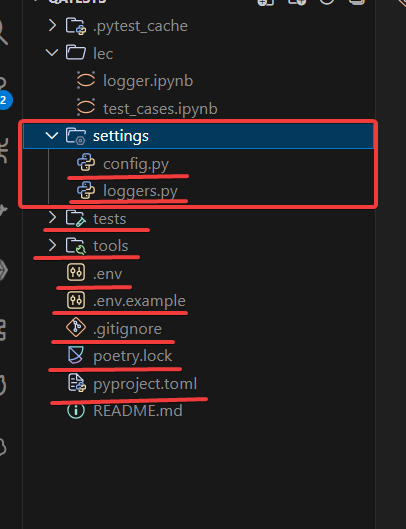

Т.е. мы создаем папку settings, в которой будем хранить настройки всего нашего приложения, включая логеры и переменные константы(это могут быть какие либо токены, ключи для доступа к API, и т.д.).


**Что такое логгирование** -- это процесс отслеживания событий в программе. Это позволяет нам увидеть, что происходит в программе и какие события происходят или произошли в определенное время. Логирование помогает быстро находить ошибки и проблемы в программе.

Как определять логер в проекте:

- **1 способ**: создание общего файла логов (нерекомендуется в больших проекта)

`root` это объект корневого логер который связан с logging бибилиотекой. Именно к root мы обращаемся когда отправляем сигнал через info, warning, error и т.д.

In [ ]:
# ./settings/loggers.py

import logging

logging.root.setLevel(logging.INFO)
file_handler = logging.FileHandler('logs/logs.log')
file_handler.setFormatter(logging.Formatter("%(asctime)s - %(module)s\n[%(levelname)s] %(funcName)s:\n %(lineno)d - %(message)s"))
logging.root.addHandler(file_handler)


In [ ]:
# ./main.py
from settings.loggers import *

logging.info('Starting the application...')
logging.warning('Warn...')
logging.error('Error...')

**Форматирование в логере**
- asctime - переменная отвечающая за вермя в формате времени выствленного на устройстве
- module - переменная отвечающая за имя модуля (модуль в котором вызывается функция)
- levelname - переменная отвечающая за уровень важности сообщения (INFO, ERROR, WARNING и т.д.)
- funcName - переменная отвечающая за имя функции
- lineno - переменная отвечающая за номер строки в коде
- message - сообщение которое передано в сигнале к логеру



- **2 способ**: создание отдельных логер обработчиков (лучший вариант использования логеров) в этом случае лучше создавать под все логеры общую папку например `logs`

In [ ]:
# ./settings/loggers.py

# 2 способ
app_logger = logging.getLogger('my_app') # Создаем логгер с именем 'my_app'
app_logger.setLevel(logging.INFO)
app_file_logger = logging.FileHandler('logs/app.log') # Создаем файловый обработчик для логера приложения(куда будут поступать сообщения)
app_file_logger.setFormatter(
    logging.Formatter("%(asctime)s - %(module)s\n[%(levelname)s] %(funcName)s:\n %(lineno)d - %(message)s")
)
app_logger.addHandler(app_file_logger) # Добавляем файловый обработчик для логера приложения
# C этого момента мы обращаемся не к самому logging, а к конкрентному логгеру - app_logger


In [ ]:
# ./main.py

# 2 способ вызова логера (локальный)
from settings.loggers import app_logger
app_logger.info('Starting the application...')
app_logger.warning('Warn...')
app_logger.error('Error...')


<u>**ВАЖНО:** Не использовать 2 подхода одновременно. Иначе при использовании первого способа со вторым, всё что записывается в отдельные файлы будут и записывать в общий файл определенный 1 способом</u>

Если использовать стандартный логер, то все время которое там используется будет записывать в формате того времени которое используется у вас на стройстве. Чтобы это исправить мы создадим класс-форматер для того чтобы он форматировал время так как нам нужно. 

In [ ]:
# ./settings/loggers.py
import logging
import datetime
from pytz import timezone # Для работы нужно установить библиотеку pytz

class MoscowTimeFormatter(logging.Formatter): # Наследуемся от стандартного форматера логгера
    
    def formatTime(self, record, datefmt=None): # Далее мы ПЕРЕОПРЕДЕЛЯЕМ метод formatTime, который будет форматировать время в соответствии с нашим МСК временем. 
        record_time = datetime.datetime.fromtimestamp(record.created, tz=timezone('Europe/Moscow')) # Переводим время из timestamp в datetime объект с учетом МСК временной зоны.
        if datefmt: # Нужни ли как то форматировать время по особенному?
            return record_time.strftime(datefmt) #Вывод в формате, который задали.
        return record_time.isoformat() # Вывод в стандартном формате
    
# ... определения всяких логеров

In [ ]:
# ./settings/loggers.py

# ... определения форматера и других логеров

# 2 способ с постоянным временем форматирования(Москва UTC+3)
app_logger = logging.getLogger('my_app')
app_logger.setLevel(logging.INFO)
app_file_logger = logging.FileHandler('logs/app.log')
app_file_logger.setFormatter(
    MoscowTimeFormatter(
        fmt = "%(asctime)s - %(module)s\n[%(levelname)s] %(funcName)s:\n %(lineno)d - %(message)s",
        datefmt = "%Y-%m-%d %H:%M:%S",
        )
)
app_logger.addHandler(app_file_logger)


Для распознования кириллицы нужно выставлять кодирвку, для файла записи, также как мы это делали при работе с файлами.

`database_2_file_logger = logging.FileHandler('logs/database.log', encoding='utf-8')`

Для полноты произошедшей ошибке, в логере рекомендуется использовать модуль traceback для полного вывода traceback ошибки произошедшей во время работы программы